In [17]:
# default liberaries
import numpy as np
import time
import matplotlib.pyplot as plt

# Comparision models
from corpus_based.sent_sim import CorpusBasedComparision as BERTComparision
from sent_bert.sent_sim_bert import MultiSentenceBertComparision

# load data function
from data.read_tsv import read_file


In [18]:
parsed_data = read_file("./data/test_data.csv", ",") # load test data

In [19]:
# Utility functions

def real_computed(res):
    return [item[0] for item in res] , [item[1] for item in res]

def MSE(result):
    result = np.array([ (a-b)**2 for a,b in result])
    return np.mean(result)

def std_dev(arr):
    arr = np.array(arr)
    return np.std(arr)

## Expermental Results

In [20]:
input_size = [10, 50]
total_size = 1520
for i in range(100, 1500, 50):
    input_size.append(i)


MSE_for_corpus = []
diff_in_std_for_corpus = []
time_for_corpus = []
time_for_SBERT = []
MSE_for_SBERT = []
diff_in_std_for_SBERT = []


print("---- for Base BERT Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_corpus.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_corpus.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_corpus.append( time.time()-time_start )
    if ind%50 == 0 : print(ind, end=".")
    corpus_results.append( [ float(comp) , BERTComparision(s1,s2) ] )
    

print("\n---- for SBERT Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_SBERT.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_SBERT.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_SBERT.append( time.time()-time_start )
    if ind%50 == 0 : print(ind, end=".")
    comp_val = MultiSentenceBertComparision( [ s1 ] , [s2] )[0][0]
    corpus_results.append([ float(comp) , comp_val ])

---- for Base BERT Approach ------
0.50.100.150.200.250.300.350.400.450.500.550.600.650.700.750.800.850.900.950.1000.1050.1100.1150.1200.1250.1300.1350.1400.1450.1500.
---- for SBERT Approach ------
0.50.100.150.200.250.300.350.400.450.500.550.600.650.700.750.800.850.900.950.1000.1050.1100.1150.1200.1250.1300.1350.1400.1450.1500.

In [21]:
size = len(input_size)

print("for Base BERT Approach")
print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
    input_size[-1] , MSE_for_corpus[-1], diff_in_std_for_corpus[-1], time_for_corpus[-1]
))

print("for SentBERT Approach")
print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
    input_size[-1] , MSE_for_SBERT[-1], diff_in_std_for_SBERT[-1], time_for_SBERT[-1]
))


for Base BERT Approach
size: 1450 , MSE: 0.12088378280599496, std_difference: 0.10196150714497076, time_taken: 465.88638067245483
for SentBERT Approach
size: 1450 , MSE: 0.1006896551724138, std_difference: 0.08135141354420111, time_taken: 46.76110482215881


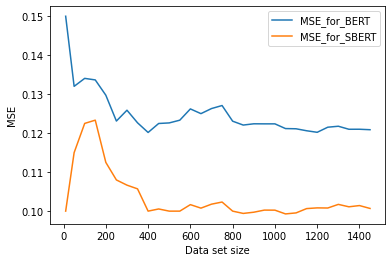

In [22]:
plt.plot( input_size , MSE_for_corpus,label="MSE_for_BERT")
plt.plot( input_size , MSE_for_SBERT ,label="MSE_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("MSE")
plt.show()

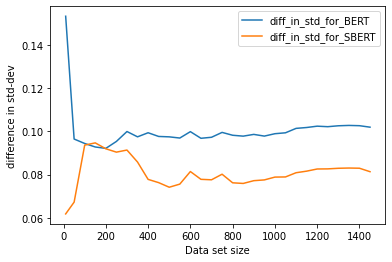

In [23]:
plt.plot( input_size , diff_in_std_for_corpus,label="diff_in_std_for_BERT")
plt.plot( input_size , diff_in_std_for_SBERT ,label="diff_in_std_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("difference in std-dev")
plt.show()

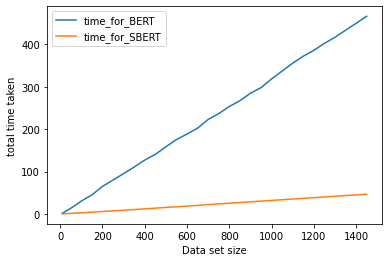

In [24]:
plt.plot( input_size , time_for_corpus,label="time_for_BERT")
plt.plot( input_size , time_for_SBERT ,label="time_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("total time taken")
plt.show()